# Script for creating result plots

### Step 1: Load necessary files from drive



In [ ]:
import matplotlib.pyplot as plt
style = dict(size=16, color='gray')
FONTSIZE_TITLE = 22 
FONTSIZE_LABEL = 16

In [ ]:
%%capture
!apt install subversion


In [ ]:
%%capture
!svn checkout https://github.com/s174508/darknet/trunk/results

### Step 2: Define helper functions

In [ ]:
def extract_values_from_log_files(lines, it, iters,loss1,loss2, map_val):
  for line in lines: 
    if len(line)>2:
      line_split = line.split(" ")
      if line_split[1][:-1].isnumeric():
        if it ==  0: # first row with interesting values !
          it = int(line_split[1][:-1]) 
          iters.append(it)
          loss1.append(float(line_split[2][:-1]))
          loss2.append(float(line_split[3][:-1]))
        else: # other rows which might contain interesting values 
          if (int(line_split[1][:-1]) == (it +1) ): # next iteration, thus interesting values 
            it += 1
            iters.append(it)
            loss1.append(float(line_split[2][:-1]))
            loss2.append(float(line_split[3][:-1]))
    if line[:29] == ' mean average precision (mAP@':
      line_split = line.split(" ")
      map_val.append(line_split[6][:-1])
  return iters,loss1,loss2, map_val


def three_plots(iters,loss1,loss2, map_val,model_name):
  fig, axs = plt.subplots(3, figsize = (10,13))
  fig.suptitle('Loss values for ' + model_name, fontsize = FONTSIZE_TITLE)

  start = 0
  slut = 500
  y_vals = loss2[start:slut]
  axs[0].plot(iters[start:slut],y_vals)
  axs[0].set_xlabel('iterations', fontsize = FONTSIZE_LABEL)
  axs[0].set_ylabel('average loss', fontsize = FONTSIZE_LABEL)
  axs[0].set_title('Validation Loss iteration 1 to 500', fontsize = FONTSIZE_LABEL)
  axs[0].tick_params(axis='x', labelsize= FONTSIZE_LABEL)
  axs[0].tick_params(axis='y', labelsize= FONTSIZE_LABEL)


  start =500 
  stepsize = 100
  y_vals = loss2[start::stepsize]
  axs[1].text(500, 2, " Start: iteration number 500", **style) 
  axs[1].plot(iters[start::stepsize],y_vals)
  axs[1].set_xlabel('iterations', fontsize = FONTSIZE_LABEL)
  axs[1].set_ylabel('average loss', fontsize = FONTSIZE_LABEL)
  axs[1].set_title('Validation Loss iteration 500 to 86000', fontsize = FONTSIZE_LABEL)
  axs[1].tick_params(axis='x', labelsize= FONTSIZE_LABEL)
  axs[1].tick_params(axis='y', labelsize= FONTSIZE_LABEL)

  start =40000
  stepsize = 100
  y_vals = loss2[start::stepsize]

  
  axs[2].plot(iters[start::stepsize],y_vals)
  axs[2].set_xlabel('iterations', fontsize = FONTSIZE_LABEL)
  axs[2].set_ylabel('average loss', fontsize = FONTSIZE_LABEL)
  axs[2].set_title('Validation Loss iteration 40000 to 86000', fontsize = FONTSIZE_LABEL)
  axs[2].tick_params(axis='x', labelsize= FONTSIZE_LABEL)
  axs[2].tick_params(axis='y', labelsize= FONTSIZE_LABEL)

  fig.tight_layout()
  fig.subplots_adjust(top=0.93)


def one_plot(iters,loss1,loss2, map_val,model_name):
  start =40000
  stepsize = 100
  y_vals = loss2[start::stepsize]

  fig = plt.figure(figsize = (10,5))
  #fig.suptitle('Loss values for multiclass', fontsize = FONTSIZE_TITLE)
  
  plt.plot(iters[start::stepsize],y_vals)
  plt.xlabel('iterations', fontsize = FONTSIZE_LABEL)
  plt.ylabel('average loss', fontsize = FONTSIZE_LABEL)
  plt.title('Validation Loss for '+ model_name +': iteration 40000 to 86000', fontsize = FONTSIZE_LABEL)
  plt.xticks(fontsize = FONTSIZE_LABEL)
  plt.yticks(fontsize = FONTSIZE_LABEL)

In [ ]:
def output_values_and_plot(model_name, plot_type = 'three'):
  iters   = []
  loss1   = []
  loss2   = []
  map_val = []
  it = 0
  count = 0
  for i in ['','2','3']:#,'3','4','5']:
    path =  '/content/results/'+ model_name +'/output' + i + '.log'
    f = open(path)
    lines  = [line.rstrip("\n") for line in f.readlines()]
    lines = lines[18:]
    [iters,loss1,loss2, map_val] = extract_values_from_log_files(lines, it, iters,loss1,loss2,map_val)
    f.close()

  if plot_type == 'three':
    three_plots(iters,loss1,loss2, map_val,model_name)
  elif plot_type == 'one':
    one_plot(iters,loss1,loss2, map_val,model_name)
  return [iters,loss1,loss2, map_val]

## extract and plot loss values. 
You can choose whether you want to plot three subplots, showing the three plots that are included in the report for singleclass, thus all values, or plot the last iterations to focus on the final loss values. 
The default is to plot three subplots, to change this to the last plot you can add the input `'one'` to the function, as shown in the commented line. 

`model_name` defines the model name and can take three different strings: 
1. singleclass
2. multiclass
3. fullclass
  


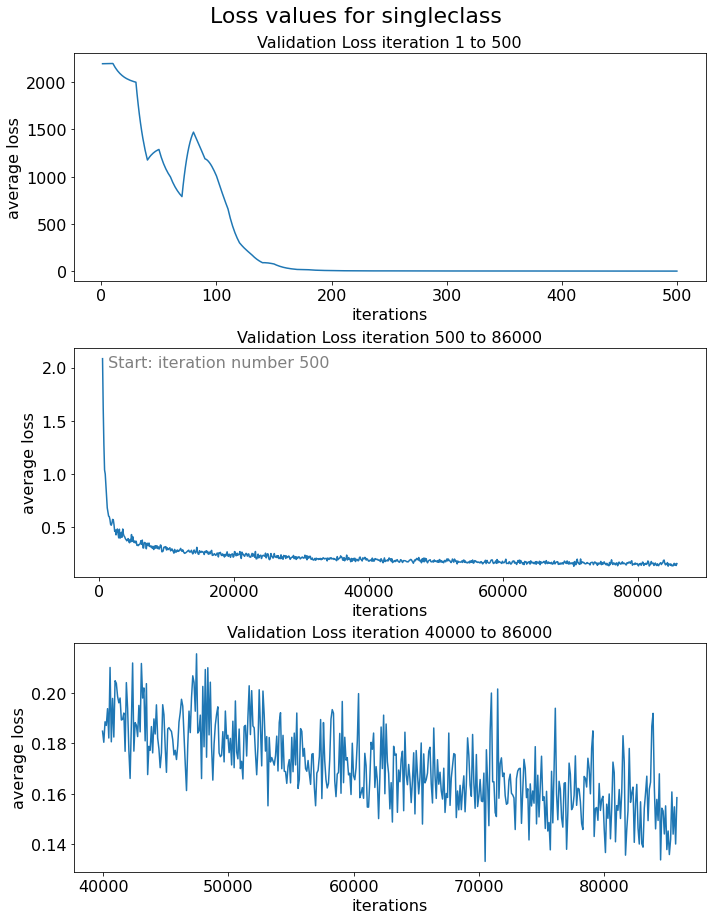

In [ ]:
model_name = 'singleclass'


[iters,loss1,loss2, map_val] = output_values_and_plot(model_name)
#[iters,loss1,loss2, map_val] = output_values_and_plot(model_name, 'one')




